In [1]:
import pandas as pd

data=pd.read_csv('/content/drive/My Drive/Datasets/micro credit /Data file.csv') # Importing data from drive

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True) #dropping unnamed column

In [5]:
data.shape

(209593, 36)

In [6]:
data.describe

<bound method NDFrame.describe of         label       msisdn     aon  ...  payback90  pcircle       pdate
0           0  21408I70789   272.0  ...  29.000000      UPW  2016-07-20
1           1  76462I70374   712.0  ...   0.000000      UPW  2016-08-10
2           1  17943I70372   535.0  ...   0.000000      UPW  2016-08-19
3           1  55773I70781   241.0  ...   0.000000      UPW  2016-06-06
4           1  03813I82730   947.0  ...   2.333333      UPW  2016-06-22
...       ...          ...     ...  ...        ...      ...         ...
209588      1  22758I85348   404.0  ...   1.000000      UPW  2016-06-17
209589      1  95583I84455  1075.0  ...   1.000000      UPW  2016-06-12
209590      1  28556I85350  1013.0  ...   3.833333      UPW  2016-07-29
209591      1  59712I82733  1732.0  ...  10.500000      UPW  2016-07-25
209592      1  65061I85339  1581.0  ...   0.000000      UPW  2016-07-07

[209593 rows x 36 columns]>

In [7]:
data.isnull().sum() #checking any null values are present or not

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [9]:
data.pcircle.value_counts()

UPW    209593
Name: pcircle, dtype: int64

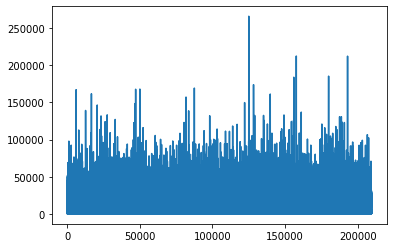

In [10]:
data.daily_decr30.plot()

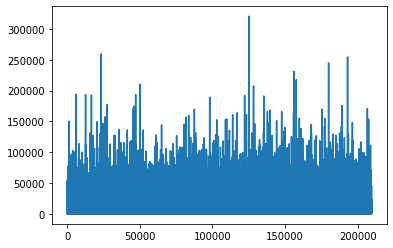

In [11]:
data.daily_decr90.plot()

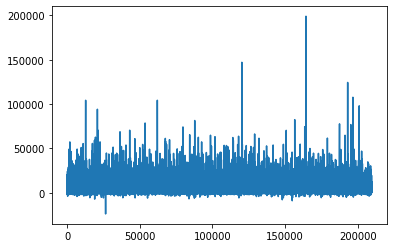

In [12]:
data.rental30.plot()

Text(0, 0.5, 'frequency')

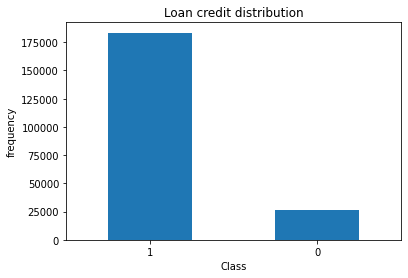

In [13]:
count_class=pd.value_counts(data.label,sort=True)
count_class.plot(kind='bar',rot=0)
plt.title('Loan credit distribution')
plt.xticks(range(2))
plt.xlabel('Class')
plt.ylabel('frequency')
#checking distribution of the target variable

In [14]:
success=data[data.label==1]
failure=data[data.label==0]


In [15]:
print(success.shape,failure.shape) # printing target variable class values

(183431, 36) (26162, 36)


In [16]:
success.sumamnt_ma_rech90.describe()

count    183431.000000
mean      13706.395778
std       17473.844265
min           0.000000
25%        3252.000000
50%        8473.000000
75%       17593.500000
max      953036.000000
Name: sumamnt_ma_rech90, dtype: float64

In [17]:
failure.sumamnt_ma_rech90.describe()

count     26162.000000
mean       3210.102783
std        6283.083435
min           0.000000
25%           0.000000
50%        1539.000000
75%        3851.000000
max      175676.000000
Name: sumamnt_ma_rech90, dtype: float64

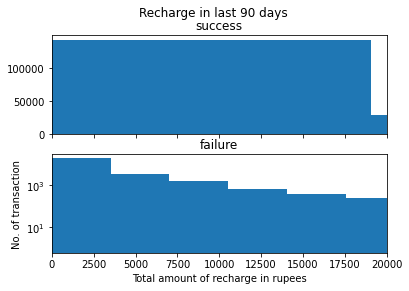

In [18]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Recharge in last 90 days')
bins=50
ax1.hist(success.sumamnt_ma_rech90,bins=bins)
ax1.set_title('success')
ax2.hist(failure.sumamnt_ma_rech90,bins=bins)
ax2.set_title('failure')
plt.xlabel('Total amount of recharge in rupees')
plt.ylabel('No. of transaction')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

In [19]:
data.pdate

0         2016-07-20
1         2016-08-10
2         2016-08-19
3         2016-06-06
4         2016-06-22
             ...    
209588    2016-06-17
209589    2016-06-12
209590    2016-07-29
209591    2016-07-25
209592    2016-07-07
Name: pdate, Length: 209593, dtype: object

In [20]:
data.pdate=pd.to_datetime(data.pdate,dayfirst=True)

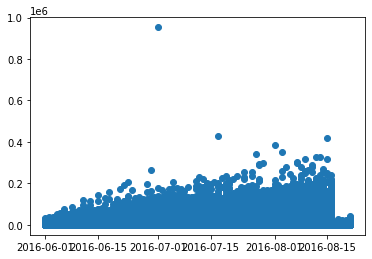

In [21]:
plt.scatter(data.pdate,data.sumamnt_ma_rech90)

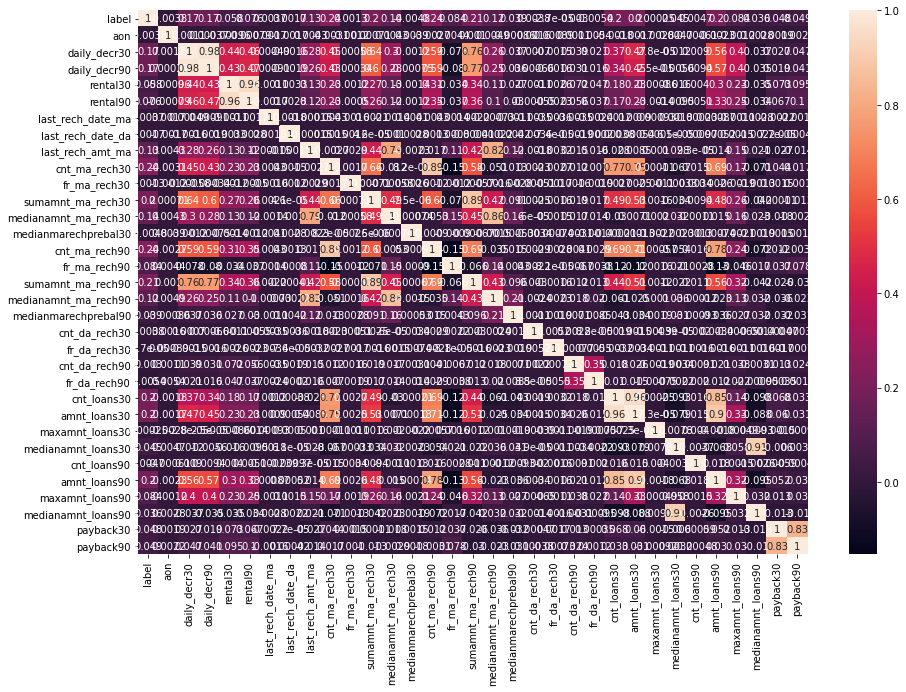

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)  #checking correlation in the data

In [23]:
data.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


In [24]:
data.drop(['daily_decr30','rental30','medianamnt_loans30'],axis=1,inplace=True) #dropping unnecessary columns

In [25]:
data.shape

(209593, 33)

In [26]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,recall_score

In [27]:
data_in=data.drop(['label','pdate','pcircle','msisdn'],axis=1)

data_op=data.label # converting in input and output data 

In [28]:
lr=LogisticRegression()
max_score=0
for i in range(0,50):
    x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=i,test_size=0.20,stratify=data_op)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('accuracy score at',i,'is',accuracy)
    if accuracy>max_score:
        max_score=accuracy
        final_state=i
print('max accuracy is ',max_score,'at',final_state)

accuracy score at 0 is 0.8801975237958921
accuracy score at 1 is 0.8751640067749707
accuracy score at 2 is 0.8751878623058756
accuracy score at 3 is 0.880507645697655
accuracy score at 4 is 0.8798874018941292
accuracy score at 5 is 0.8751878623058756
accuracy score at 6 is 0.8802929459195115
accuracy score at 7 is 0.8804360791049405
accuracy score at 8 is 0.8811994560938954
accuracy score at 9 is 0.8827977766645196
accuracy score at 10 is 0.8750924401822563
accuracy score at 11 is 0.8795295689305566
accuracy score at 12 is 0.8813664448102293
accuracy score at 13 is 0.8814857224647534
accuracy score at 14 is 0.8794818578687469
accuracy score at 15 is 0.8822490994537083
accuracy score at 16 is 0.8807223454757985
accuracy score at 17 is 0.8751878623058756
accuracy score at 18 is 0.8812948782175147
accuracy score at 19 is 0.875140151244066
accuracy score at 20 is 0.8835372981225698
accuracy score at 21 is 0.8811994560938954
accuracy score at 22 is 0.8801498127340824
accuracy score at 23 is

In [29]:
x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=20,test_size=0.20,stratify=data_op)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
test_accuracy=accuracy_score(y_test,y_pred)
train_accuracy=accuracy_score(y_train,train_pred)
train_accuracy,test_accuracy

(0.8815916600069181, 0.8835372981225698)

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [31]:
lr_test_auc=roc_auc_score(y_test,y_pred)
lr_train_auc=roc_auc_score(y_train,train_pred)

In [32]:
lr_test_auc,lr_train_auc

(0.5490979684201813, 0.544875751001533)

In [33]:
lr_test_probs=lr.predict_proba(x_test)
lr_train_probs=lr.predict_proba(x_train)
lr_test_probs=lr_test_probs[:,1]
lr_train_probs=lr_train_probs[:,1]

In [34]:
lr_test_fpr,lr_test_tpr,test_threshold=roc_curve(y_test,lr_test_probs)
lr_train_fpr,lr_train_tpr,train_threshold=roc_curve(y_train,lr_train_probs)

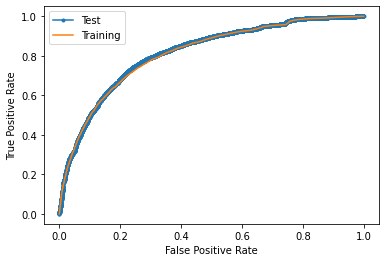

In [35]:
plt.plot(lr_test_fpr,lr_test_tpr,marker='.',label='Test')
plt.plot(lr_train_fpr,lr_train_tpr,label='Training')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [42]:
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import KFold
GNB=GNB()

In [44]:
GNB.fit(x_train,y_train)
y_pred=GNB.predict(x_test)
train_pred=GNB.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print(accuracy,accuracy1)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(GNB,data_in,data_op,cv=kf,scoring='accuracy')
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))


0.5618454638707985 0.5642079272874745
Cross val score: [0.56560115 0.56116412 0.56121183 0.55646739 0.5643399  0.56252684
 0.55842359 0.56624839 0.56009352 0.5690157 ]
Mean cv: 0.5625092419624066


In [45]:
GNB_test_auc=roc_auc_score(y_test,y_pred)
GNB_train_auc=roc_auc_score(y_train,train_pred)

In [46]:
GNB_test_auc,GNB_train_auc

(0.7010091786881486, 0.7016438311634442)

In [47]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)
c

array([[ 4638,   594],
       [17773, 18914]])

In [53]:
from sklearn.ensemble import RandomForestClassifier as RFC
RFC=RFC(random_state=0,criterion='entropy')
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(RFC,data_in,data_op,cv=kf,scoring='accuracy')
RFC.fit(x_train,y_train)
y_pred=RFC.predict(x_test)
train_pred=RFC.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print(accuracy,accuracy1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))

0.9119730909611393 0.9996660185836802
Cross val score: [0.91183206 0.9096374  0.91025763 0.91311608 0.91178014 0.91426118
 0.91373634 0.91220955 0.91182785 0.91311608]
Mean cv: 0.9121774334314653


In [54]:
c=confusion_matrix(y_test,y_pred)
c

array([[ 2276,  2956],
       [  734, 35953]])

In [55]:
RF_test_auc=roc_auc_score(y_test,y_pred)
RF_train_auc=roc_auc_score(y_train,train_pred)

In [56]:
RF_test_auc,RF_train_auc

(0.7075041017704193, 0.9995429273373531)

In [57]:
from sklearn.ensemble import RandomForestClassifier as RFC
RFC=RFC(random_state=20,criterion='gini')
RFC.fit(x_train,y_train)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(RFC,data_in,data_op,cv=kf,scoring='accuracy')
y_pred=RFC.predict(x_test)
train_pred=RFC.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print(accuracy,accuracy1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))

0.912020802022949 0.9996540906759546
Cross val score: [0.91459924 0.9081584  0.91230916 0.9127821  0.90948996 0.91445203
 0.91306837 0.91220955 0.91101675 0.91020564]
Mean cv: 0.9118291184369776


In [58]:
c=confusion_matrix(y_test,y_pred)
c

array([[ 2269,  2963],
       [  725, 35962]])

In [59]:
RF_test_auc=roc_auc_score(y_test,y_pred)
RF_train_auc=roc_auc_score(y_train,train_pred)

In [60]:
RF_test_auc,RF_train_auc

(0.7069578007783673, 0.9995361127486816)

In [68]:
from sklearn.tree import DecisionTreeClassifier as DTC
DTC=DTC(criterion='entropy',max_depth=8,random_state=20)
DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
train_pred=DTC.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print('test_accuracy:',accuracy,'train_accuracy',accuracy1)
cm=confusion_matrix(y_test,y_pred)
cm

test_accuracy: 0.9076790953982681 train_accuracy 0.9087515058983504


array([[ 1955,  3277],
       [  593, 36094]])

In [69]:
dtc_test_auc=roc_auc_score(y_test,y_pred)
dtc_train_auc=roc_auc_score(y_train,train_pred)

In [70]:
dtc_test_auc,dtc_train_auc

(0.6787491578898408, 0.6795969945378322)

In [78]:
dtc_test_probs=DTC.predict_proba(x_test)
dtc_train_probs=DTC.predict_proba(x_train)
dtc_test_probs=dtc_test_probs[:,1]
dtc_train_probs=dtc_train_probs[:,1]

In [79]:
dtc_test_fpr,dtc_test_tpr,test_threshold=roc_curve(y_test,dtc_test_probs)
dtc_train_fpr,dtc_train_tpr,train_threshold=roc_curve(y_train,dtc_train_probs)

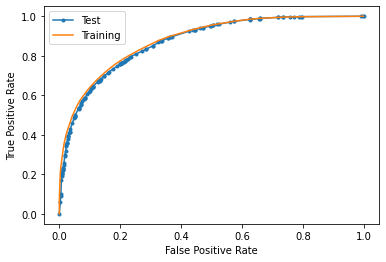

In [80]:
plt.plot(dtc_test_fpr,dtc_test_tpr,marker='.',label='Test')
plt.plot(dtc_train_fpr,dtc_train_tpr,label='Training')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [81]:
from sklearn.ensemble import AdaBoostClassifier as ABC
ABC=ABC(base_estimator=DTC,learning_rate=0.4,random_state=20)
ABC.fit(x_train,y_train)
y_pred=ABC.predict(x_test)
train_pred=ABC.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print('accuracy:',accuracy,'accuracy_train:',accuracy1)

accuracy: 0.9101123595505618 accuracy_train: 0.9343845796008922


In [82]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 2380,  2852],
       [  916, 35771]])

In [83]:
abc_test_auc=roc_auc_score(y_test,y_pred)
abc_train_auc=roc_auc_score(y_train,train_pred)

In [84]:
abc_test_auc,abc_train_auc

(0.7149624970272949, 0.7836653463013122)

In [85]:
abc_test_probs=ABC.predict_proba(x_test)
abc_train_probs=ABC.predict_proba(x_train)
abc_test_probs=abc_test_probs[:,1]
abc_train_probs=abc_train_probs[:,1]

In [86]:
abc_test_fpr,abc_test_tpr,test_threshold=roc_curve(y_test,abc_test_probs)
abc_train_fpr,abc_train_tpr,train_threshold=roc_curve(y_train,abc_train_probs)

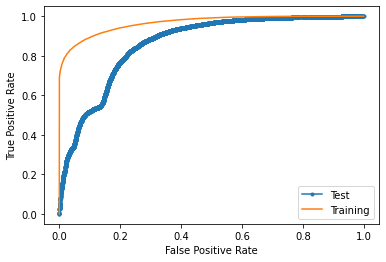

In [87]:
plt.plot(abc_test_fpr,abc_test_tpr,marker='.',label='Test')
plt.plot(abc_train_fpr,abc_train_tpr,label='Training')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# New Section

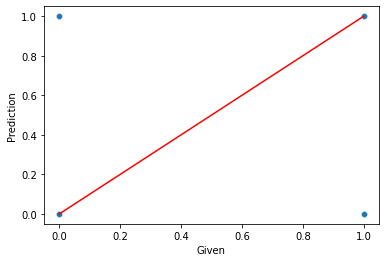

In [90]:
plot_k = sns.scatterplot(y_test, y_pred)
plot_k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,1,5)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')


In [92]:
label=pd.DataFrame({'Actual ':y_test,'Predicted ':y_pred})
label

,Actual,Predicted
196360,1,1
90074,1,1
173412,1,1
176241,1,1
164373,1,1
...,...,...
86123,1,1
74164,1,1
38261,1,1
158599,1,1


In [93]:
label.to_csv('microCreditProject_op.csv')

In [95]:
from sklearn.externals import joblib
joblib.dump(ABC,'ABC_microCreditProject.pkl')

['ABC_microCreditProject.pkl']

We can see that ada boost with base estimator as decison tree is giving good results. Also accuracy and roc_auc score are much better for both training and testing data. So choosing it as final model for prediction.
